In [125]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xgb 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import tree
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


In [92]:
df=pd.read_csv("Data set/AIDS_Classification.csv")
df

time  trt  age      wtkg  hemo  homo  drugs  karnof  oprior  z30  ...  \
0      948    2   48   89.8128     0     0      0     100       0    0  ...   
1     1002    3   61   49.4424     0     0      0      90       0    1  ...   
2      961    3   45   88.4520     0     1      1      90       0    1  ...   
3     1166    3   47   85.2768     0     1      0     100       0    1  ...   
4     1090    0   43   66.6792     0     1      0     100       0    1  ...   
...    ...  ...  ...       ...   ...   ...    ...     ...     ...  ...  ...   
2134  1091    3   21   53.2980     1     0      0     100       0    1  ...   
2135   395    0   17  102.9672     1     0      0     100       0    1  ...   
2136  1104    2   53   69.8544     1     1      0      90       0    1  ...   
2137   465    0   14   60.0000     1     0      0     100       0    0  ...   
2138  1045    3   45   77.3000     1     0      0     100       0    0  ...   

      str2  strat  symptom  treat  offtrt  cd40  cd420  cd80  cd820  infected  
0        0      1        0      1       0   422    477   566    324         0  
1        1      3        0      1       0   162    218   392    564         1  
2        1      3        0      1       1   326    274  2063   1893         0  
3        1      3        0      1       0   287    394  1590    966         0  
4        1      3        0      0       0   504    353   870    782         0  
...    ...    ...      ...    ...     ...   ...    ...   ...    ...       ...  
2134     1      3        0      1       1   152    109   561    720         0  
2135     1      3        0      0       1   373    218  1759   1030         0  
2136     1      3        0      1       0   419    364  1391   1041         0  
2137     0      1        0      0       0   166    169   999   1838         1  
2138     0      1        0      1       0   911    930   885    526         0  

[2139 rows x 23 columns]

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      2139 non-null   int64  
 1   trt       2139 non-null   int64  
 2   age       2139 non-null   int64  
 3   wtkg      2139 non-null   float64
 4   hemo      2139 non-null   int64  
 5   homo      2139 non-null   int64  
 6   drugs     2139 non-null   int64  
 7   karnof    2139 non-null   int64  
 8   oprior    2139 non-null   int64  
 9   z30       2139 non-null   int64  
 10  preanti   2139 non-null   int64  
 11  race      2139 non-null   int64  
 12  gender    2139 non-null   int64  
 13  str2      2139 non-null   int64  
 14  strat     2139 non-null   int64  
 15  symptom   2139 non-null   int64  
 16  treat     2139 non-null   int64  
 17  offtrt    2139 non-null   int64  
 18  cd40      2139 non-null   int64  
 19  cd420     2139 non-null   int64  
 20  cd80      2139 non-null   int6

In [94]:
df.describe()

time          trt          age         wtkg         hemo  \
count  2139.000000  2139.000000  2139.000000  2139.000000  2139.000000   
mean    879.098177     1.520804    35.248247    75.125311     0.084151   
std     292.274324     1.127890     8.709026    13.263164     0.277680   
min      14.000000     0.000000    12.000000    31.000000     0.000000   
25%     727.000000     1.000000    29.000000    66.679200     0.000000   
50%     997.000000     2.000000    34.000000    74.390400     0.000000   
75%    1091.000000     3.000000    40.000000    82.555200     0.000000   
max    1231.000000     3.000000    70.000000   159.939360     1.000000   

              homo        drugs       karnof       oprior          z30  ...  \
count  2139.000000  2139.000000  2139.000000  2139.000000  2139.000000  ...   
mean      0.661057     0.131370    95.446470     0.021973     0.550257  ...   
std       0.473461     0.337883     5.900985     0.146629     0.497584  ...   
min       0.000000     0.000000    70.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000    90.000000     0.000000     0.000000  ...   
50%       1.000000     0.000000   100.000000     0.000000     1.000000  ...   
75%       1.000000     0.000000   100.000000     0.000000     1.000000  ...   
max       1.000000     1.000000   100.000000     1.000000     1.000000  ...   

              str2        strat      symptom        treat       offtrt  \
count  2139.000000  2139.000000  2139.000000  2139.000000  2139.000000   
mean      0.585788     1.979897     0.172978     0.751286     0.362786   
std       0.492701     0.899053     0.378317     0.432369     0.480916   
min       0.000000     1.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000     0.000000     1.000000     0.000000   
50%       1.000000     2.000000     0.000000     1.000000     0.000000   
75%       1.000000     3.000000     0.000000     1.000000     1.000000   
max       1.000000     3.000000     1.000000     1.000000     1.000000   

              cd40        cd420         cd80        cd820     infected  
count  2139.000000  2139.000000  2139.000000  2139.000000  2139.000000  
mean    350.501169   371.307153   986.627396   935.369799     0.243572  
std     118.573863   144.634909   480.197750   444.976051     0.429338  
min       0.000000    49.000000    40.000000   124.000000     0.000000  
25%     263.500000   269.000000   654.000000   631.500000     0.000000  
50%     340.000000   353.000000   893.000000   865.000000     0.000000  
75%     423.000000   460.000000  1207.000000  1146.500000     0.000000  
max    1199.000000  1119.000000  5011.000000  6035.000000     1.000000  

[8 rows x 23 columns]

In [95]:
df.corr()['infected'].sort_values()

time       -0.574989
cd420      -0.345908
cd40       -0.185647
treat      -0.129560
karnof     -0.102944
trt        -0.084360
race       -0.055977
drugs      -0.049794
hemo       -0.011154
wtkg        0.016205
cd820       0.019494
oprior      0.041251
gender      0.045118
homo        0.054279
cd80        0.065338
age         0.070384
offtrt      0.092850
str2        0.123390
z30         0.125488
preanti     0.128453
symptom     0.129234
strat       0.131441
infected    1.000000
Name: infected, dtype: float64

In [96]:
ax=px.scatter_3d(df,x="age", y="wtkg", z="time",color='infected',template= "plotly_dark")
ax.show()

<Axes: >

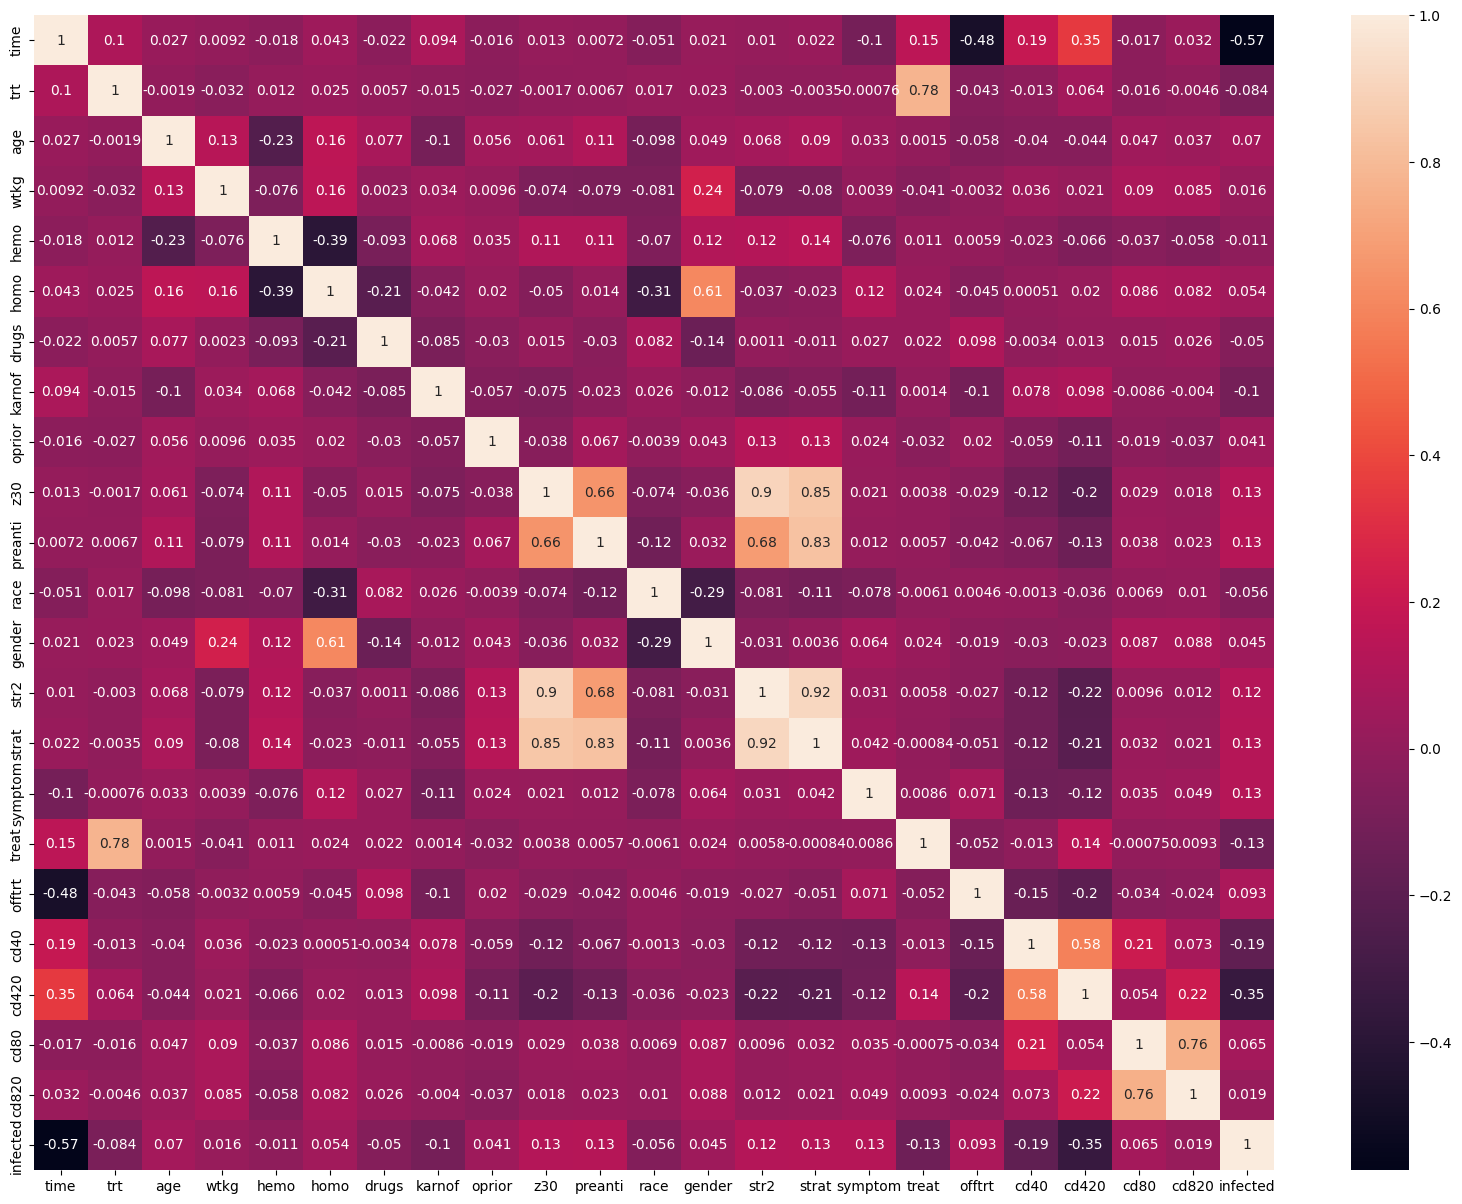

In [97]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

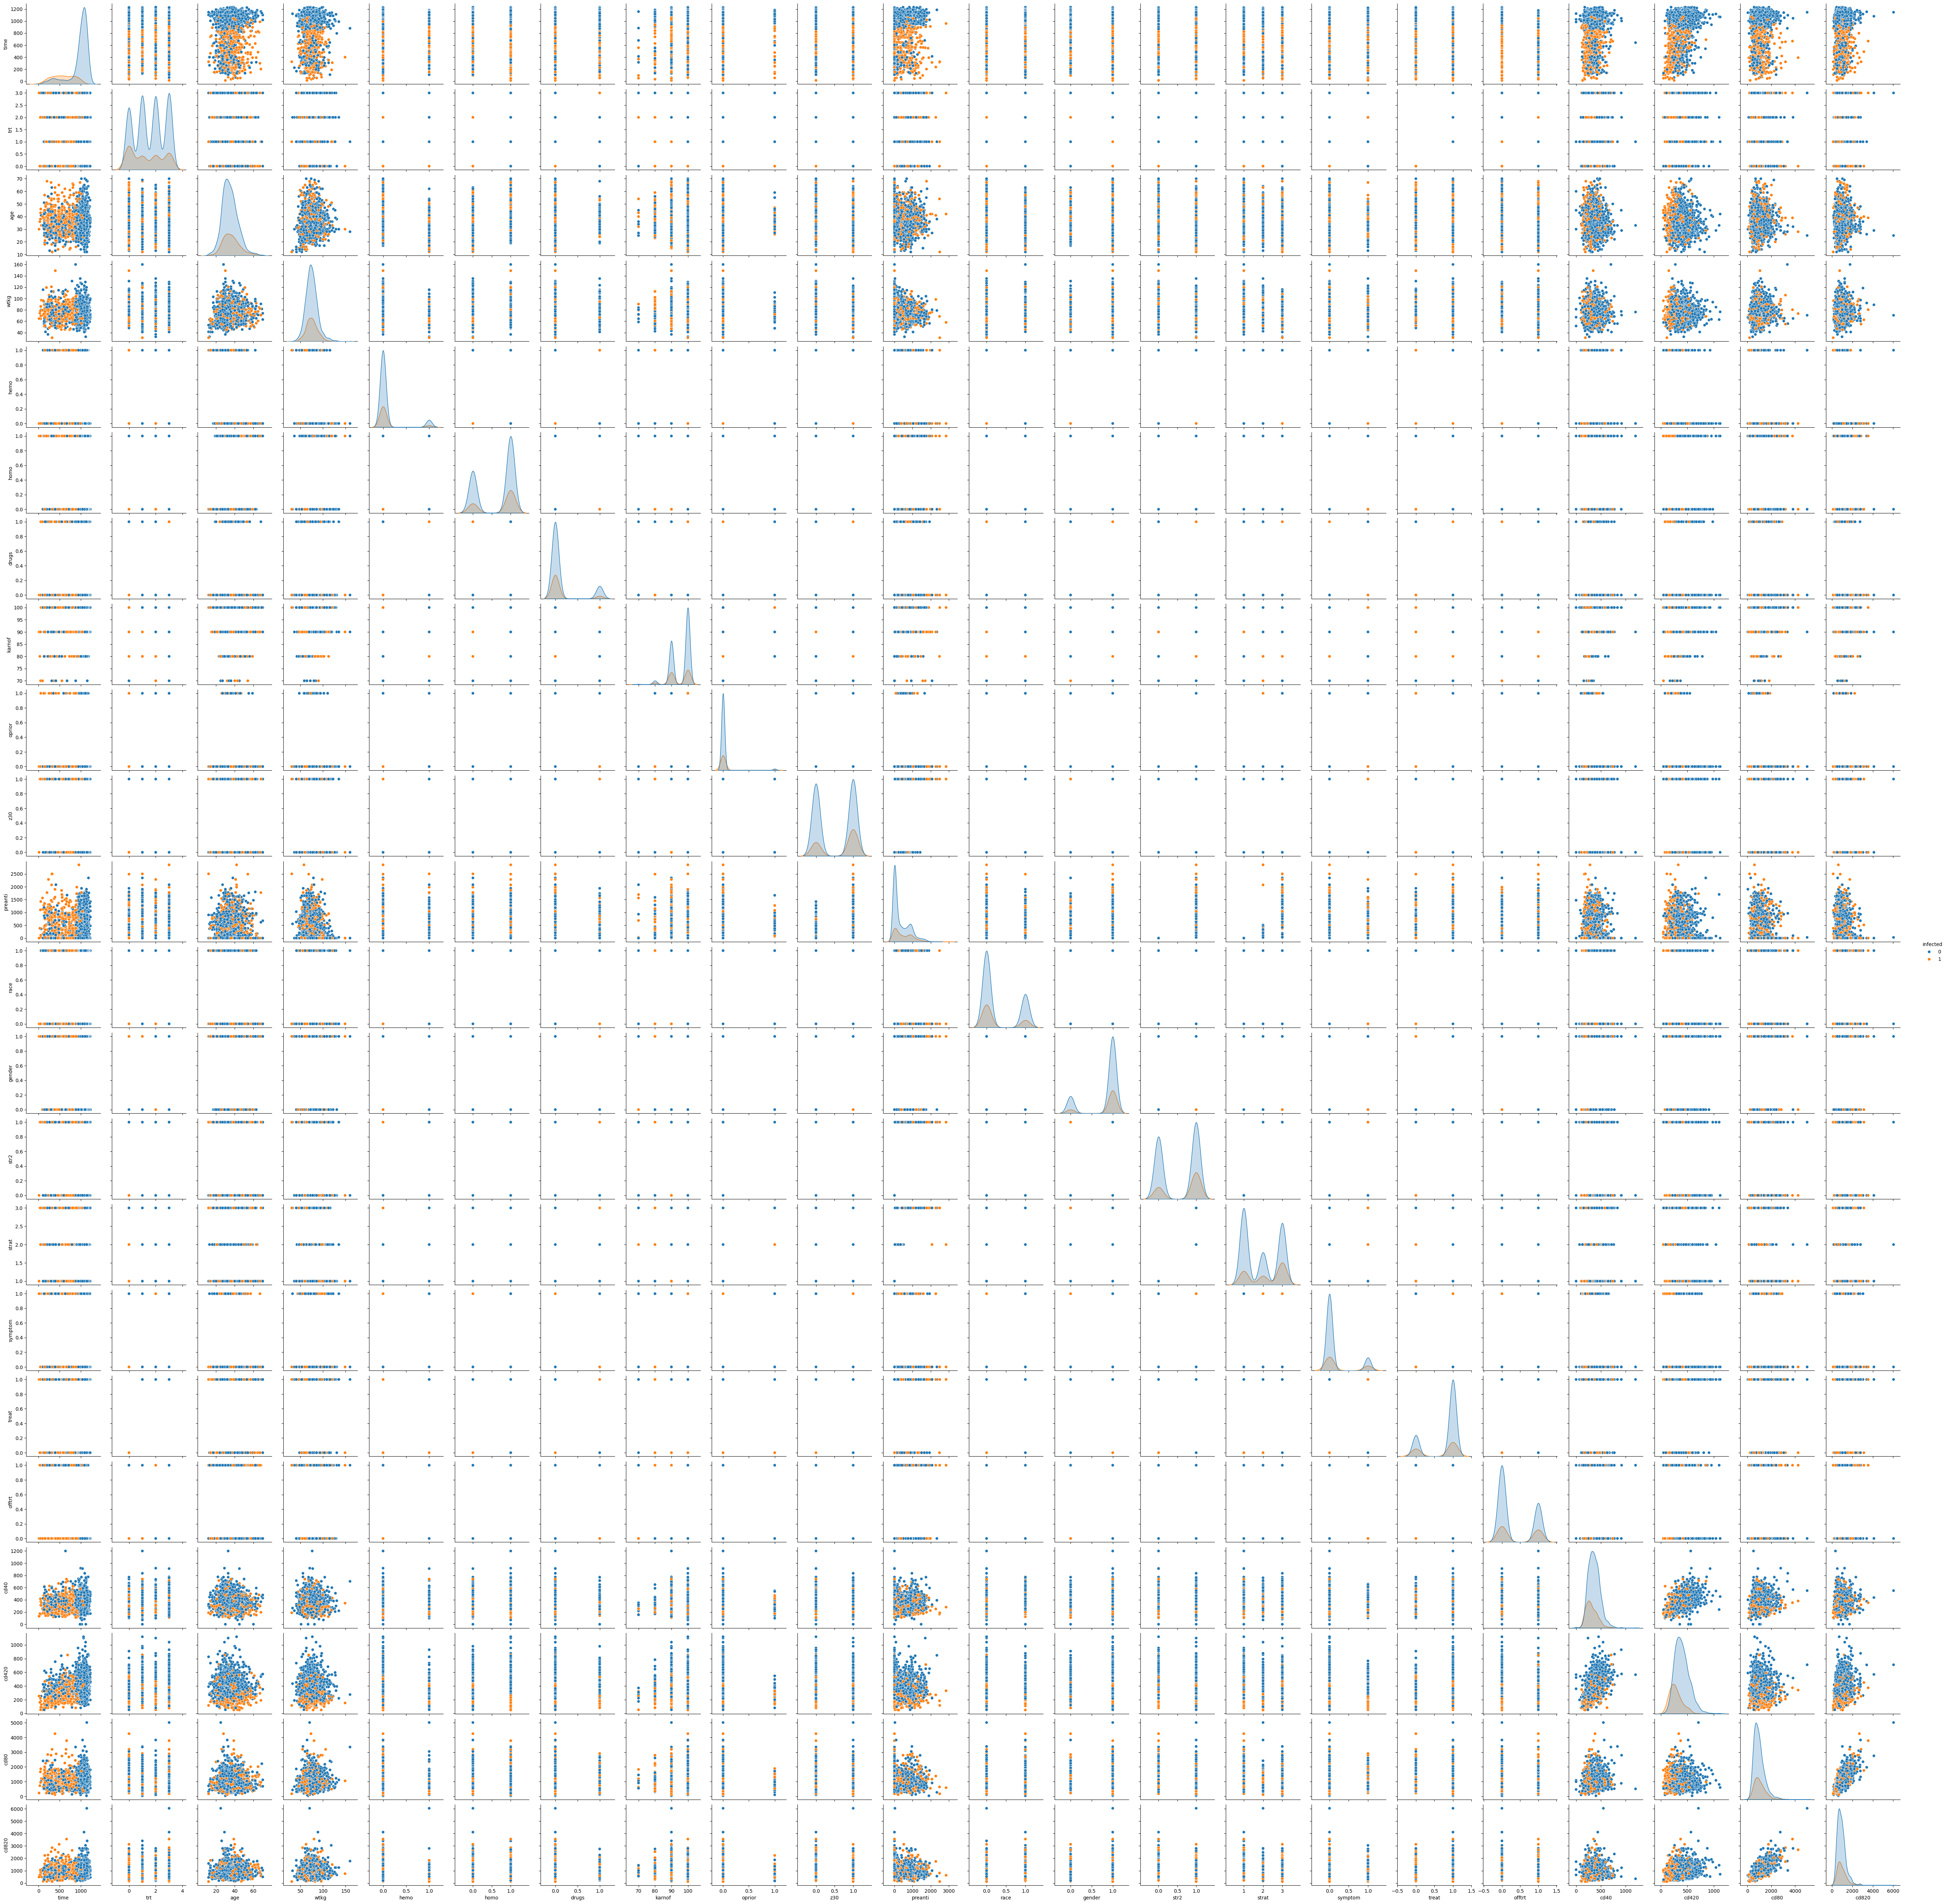

In [98]:
sns.pairplot(df,hue='infected')
plt.show()

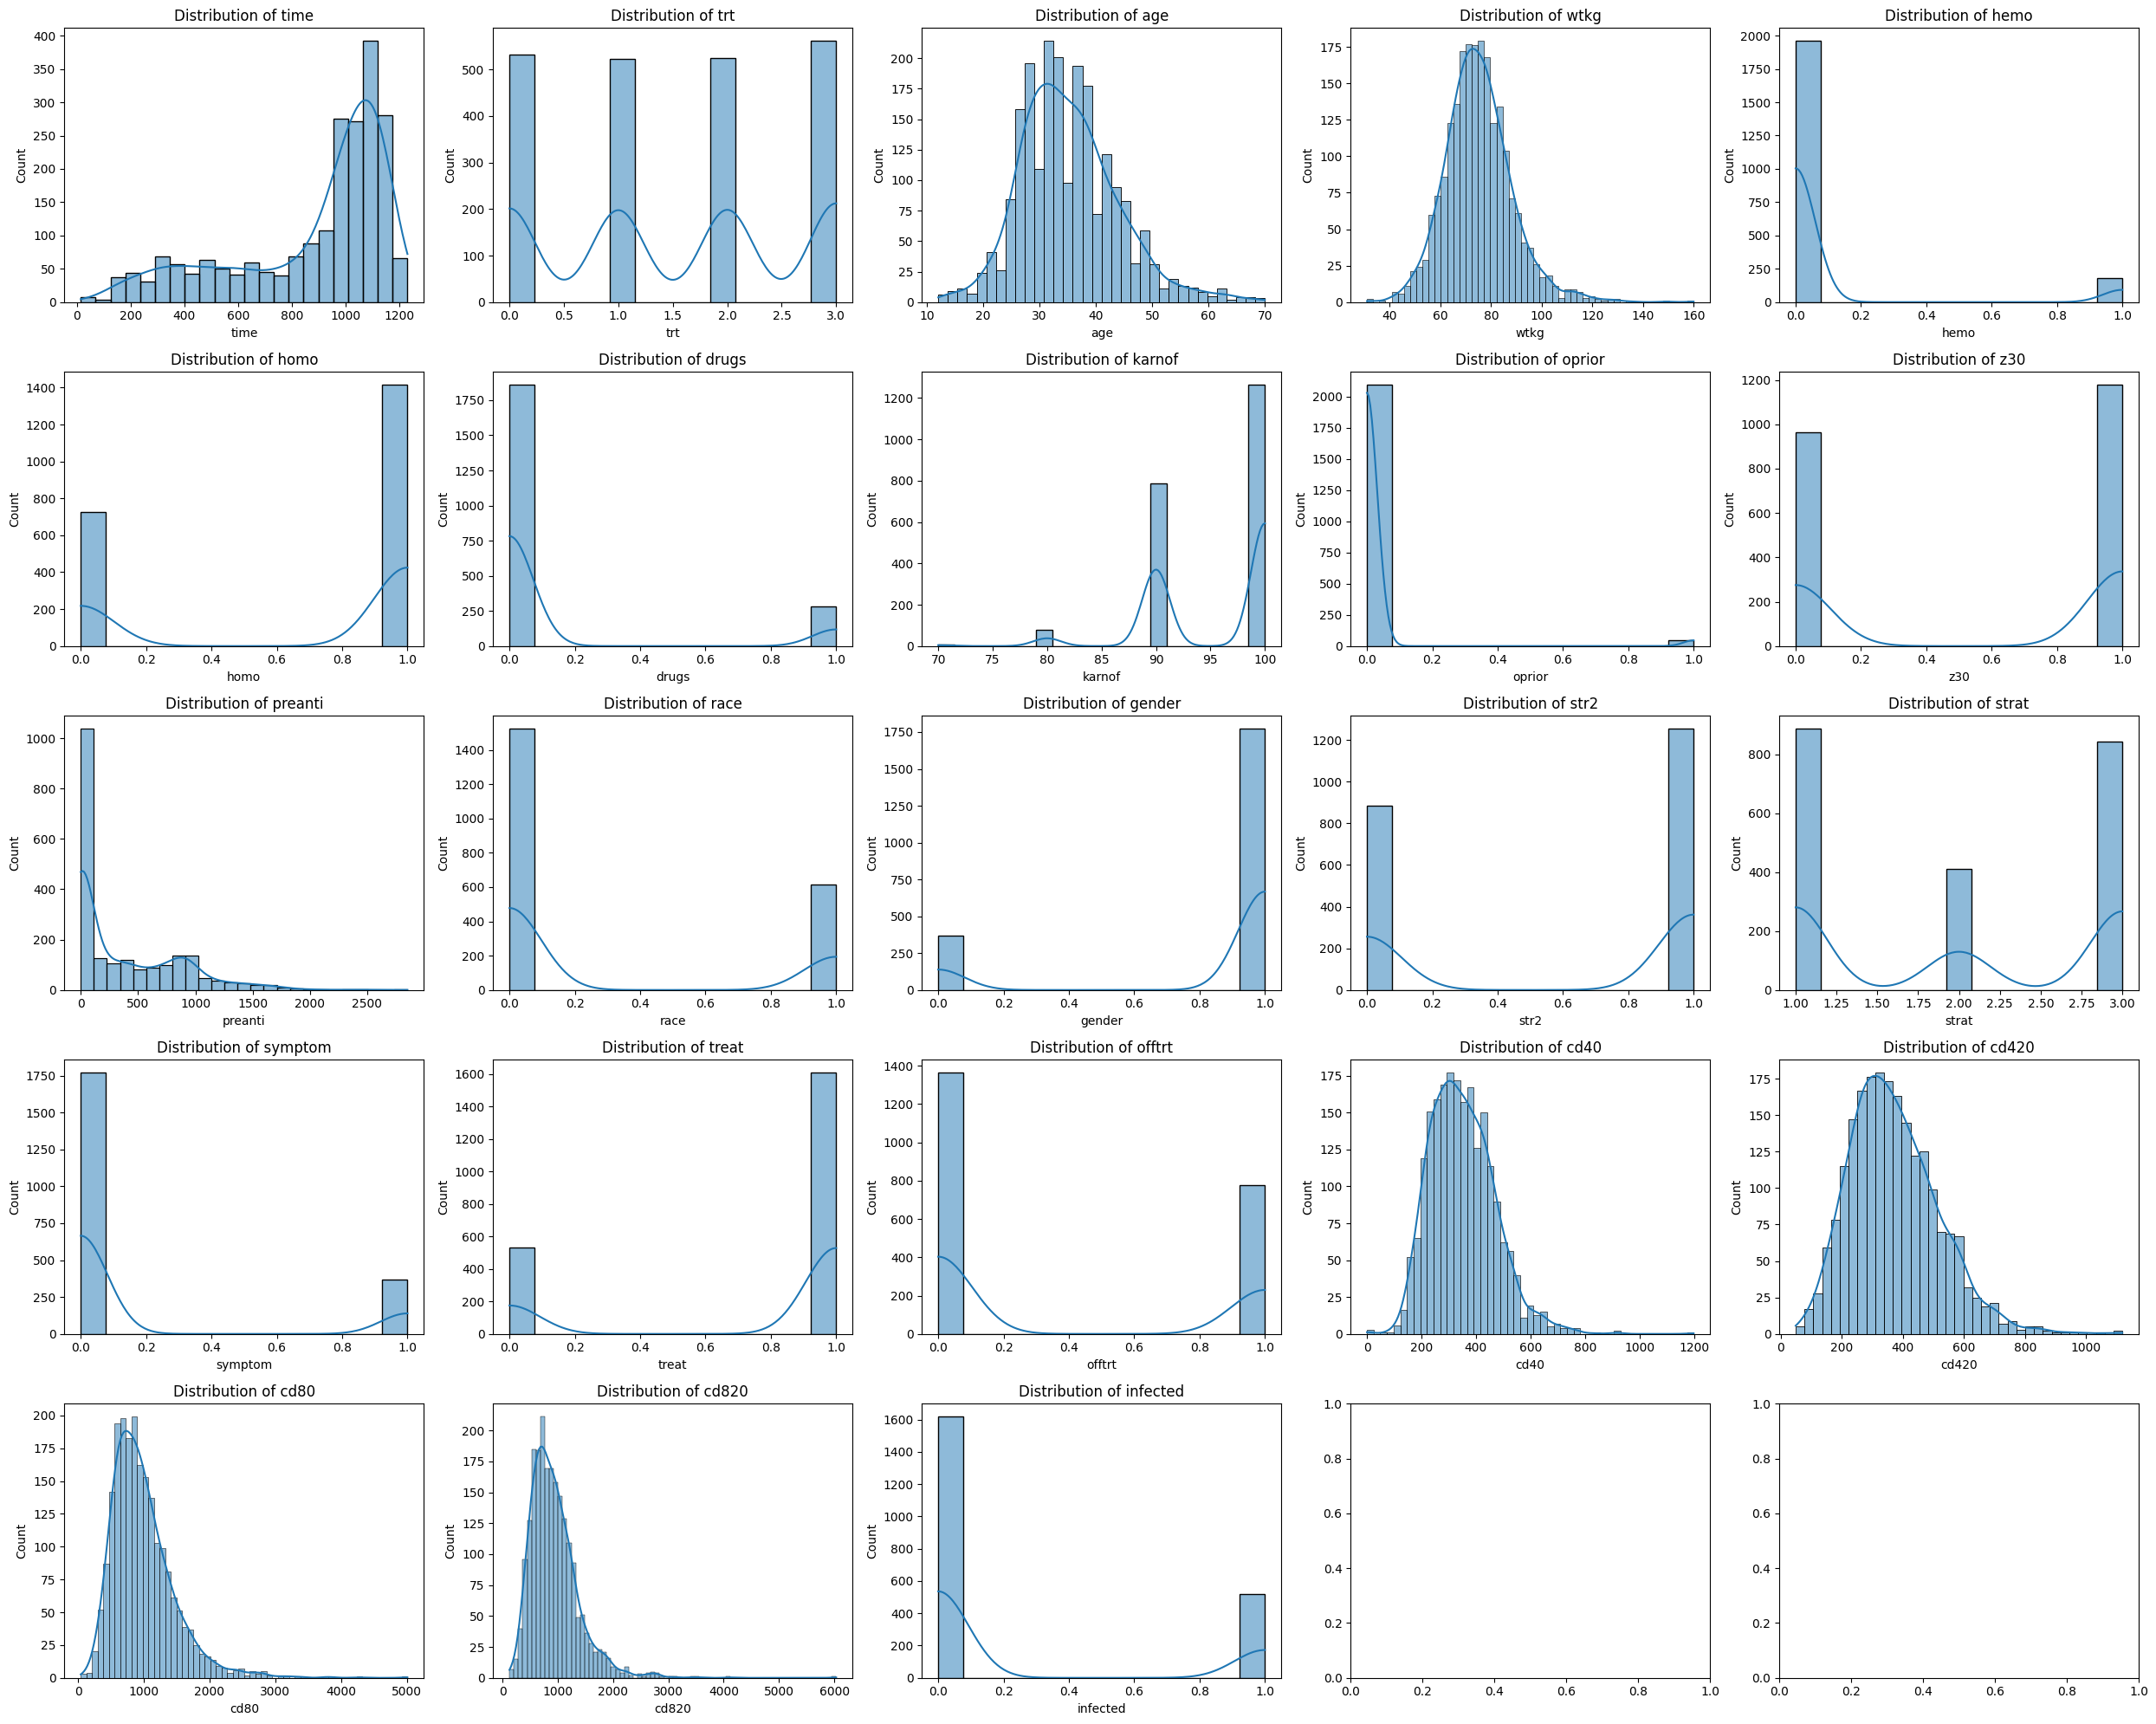

In [99]:
fig,ax=plt.subplots(5,5,figsize=(25,20))
for i,col in enumerate(df.columns):
    axs=ax[i//5,i%5]
    sns.histplot(df[col],ax=axs,kde=True)
    axs.set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

<Axes: xlabel='infected', ylabel='count'>

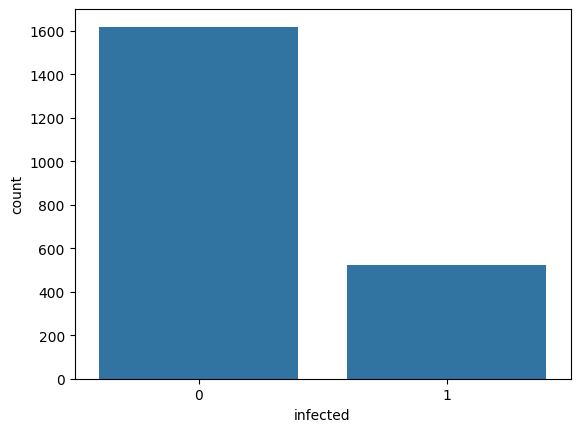

In [100]:
sns.countplot(x=df['infected'])

In [101]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [102]:
sampler=RandomOverSampler(random_state=42)

x_sample,y_sample=sampler.fit_resample(x,y)

In [103]:
df.isnull().sum()

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x_sample,y_sample,test_size=0.20)

In [105]:
def evaluation(y_test,y_pred,label=None):
    
    print(f"Accuracy of {label} is : {accuracy_score(y_test,y_pred)*100}%")
    
    print("--------------------------------------------")
    
    print(f'classification report of {label} is \n {classification_report(y_test,y_pred)}')
    
    cm=confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,annot=True,cmap='Blues',fmt='d')
    plt.title(f'Confusion Matrix of {label}')
    plt.xlabel("Predication")
    plt.ylabel("Actual")
    plt.show()
    return

In [106]:
def DecisionTree(x_train,x_test,y_train,y_test,label=None):
    model_tree=DecisionTreeClassifier(criterion='entropy', max_depth= 3, min_samples_leaf=1, min_samples_split= 2)
    
    model_tree.fit(x_train,y_train)
    
    ypred=model_tree.predict(x_test)
    
    evaluation(y_test,ypred,label)
    
    plt.figure(figsize=(10,8))
    tree.plot_tree(model_tree,
                   feature_names=df.iloc[:,:-1].columns,
                   class_names=['infected','uninfected'],filled=True,
                   rounded=True)
    
    return

In [107]:
def RandomForest(x_train,x_test,y_train,y_test,label=None):
    rfc=RandomForestClassifier(criterion= 'log_loss', max_depth= 16, min_samples_leaf= 4, min_samples_split= 3, n_estimators= 16)
    
    rfc.fit(x_train,y_train)
    
    ypred=rfc.predict(x_test)
    
    evaluation(y_test,ypred,label)
    return
    

In [108]:
def AdaBoost(x_train,x_test,y_train,y_test,label=None):
    ada=AdaBoostClassifier(learning_rate= 0.03, n_estimators= 5)
    
    ada.fit(x_train,y_train)
    
    ypred=ada.predict(x_test)
    
    evaluation(y_test,ypred,label)
    return

In [109]:
def xgboosting(x_train,x_test,y_train,y_test,label=None):
    
    XG=xgb.XGBClassifier()
    
    XG.fit(x_train,y_train)
    
    ypred=XG.predict(x_test)
    
    evaluation(y_test,ypred,label)
    

In [110]:
def Search(model,param,x_train,y_train):
    
    grid=GridSearchCV(model,param)
    
    grid.fit(x_train,y_train)
    
    best_params=grid.best_params_
    
    return best_params

In [131]:
param_tree={
            'criterion':['gini', 'entropy', 'log_loss'],
            'max_depth':[2,3,4,5],
            'min_samples_split':[1,2,3],
            'min_samples_leaf':[1,2,3,4]}

param_rfc={'n_estimators':[14,15,16],
           "criterion":['gini', 'entropy', 'log_loss'],
           'max_depth':[15,16],
           'min_samples_split':[3,4,5],
           'min_samples_leaf':[4,5,6]}

param_ada={'n_estimators':[5,6,7],
           'learning_rate':[0.01,0.02,0.03,0.04]}

param_svm={"C":[0.1,0.5,1],
           "kernel":['poly','linear','rbf'],
           'gamma':[0.01,0.1,0.5]}

param_grd={"learning_rate":[0.5,1,1.5,2],
           "n_estimators":[3,4,5,6],
           'max_depth':[15,16,17],
           'min_samples_split':[3,4,5],
           'min_samples_leaf':[2,3,4,5]}


In [112]:
param_tree=Search(DecisionTreeClassifier(),param_tree,x_train,y_train)

print(param_tree)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}


In [113]:
param_rf=Search(RandomForestClassifier(),param_rfc,x_train,y_train)

print(param_rf)

{'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 14}


In [114]:
param_ada=Search(AdaBoostClassifier(),param_ada,x_train,y_train)

print(param_ada)

{'learning_rate': 0.01, 'n_estimators': 5}


In [132]:
param_grd=Search(GradientBoostingClassifier(),param_grd,x_train,y_train)

print(param_grd)

{'learning_rate': 1, 'max_depth': 17, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 6}


In [115]:
# param_svc=Search(SVC(),param_svm,x_train,y_train)

# print(param_svc)

Accuracy of DecisionTree is : 84.41358024691358%
--------------------------------------------
classification report of DecisionTree is 
               precision    recall  f1-score   support

           0       0.87      0.82      0.85       336
           1       0.82      0.87      0.84       312

    accuracy                           0.84       648
   macro avg       0.84      0.85      0.84       648
weighted avg       0.85      0.84      0.84       648



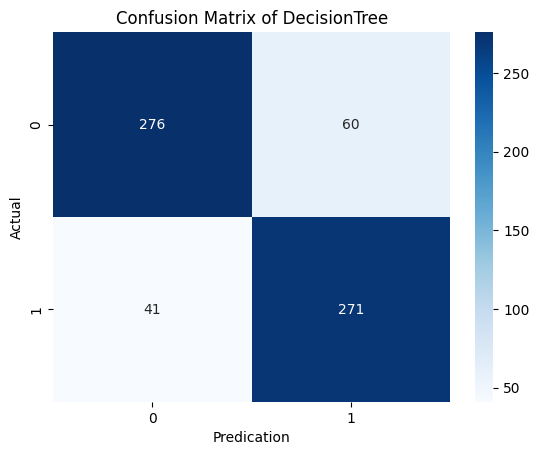

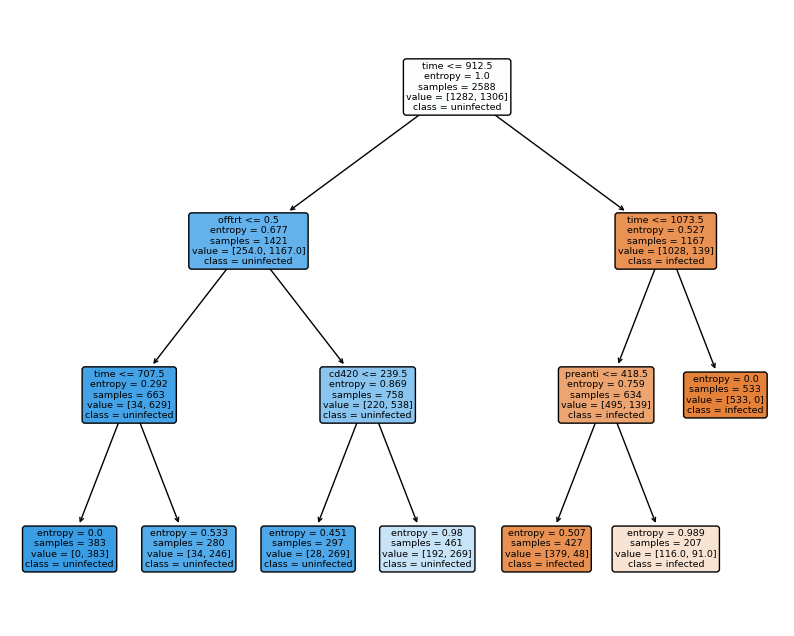

In [116]:
DecisionTree(x_train,x_test,y_train,y_test,'DecisionTree')

Accuracy of Random Forest is : 92.74691358024691%
--------------------------------------------
classification report of Random Forest is 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       336
           1       0.91      0.95      0.93       312

    accuracy                           0.93       648
   macro avg       0.93      0.93      0.93       648
weighted avg       0.93      0.93      0.93       648



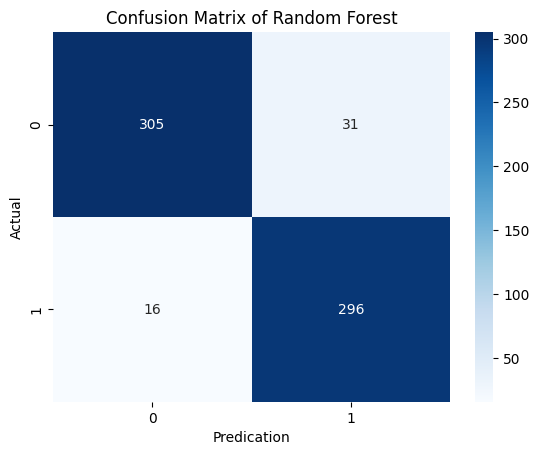

In [117]:
RandomForest(x_train,x_test,y_train,y_test,'Random Forest')

Accuracy of Ada Boost is : 84.41358024691358%
--------------------------------------------
classification report of Ada Boost is 
               precision    recall  f1-score   support

           0       0.87      0.82      0.85       336
           1       0.82      0.87      0.84       312

    accuracy                           0.84       648
   macro avg       0.84      0.85      0.84       648
weighted avg       0.85      0.84      0.84       648



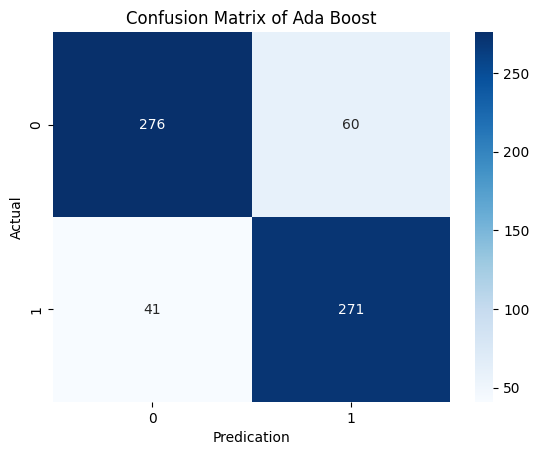

In [118]:
AdaBoost(x_train,x_test,y_train,y_test,'Ada Boost')

Accuracy of xgboosting is : 95.67901234567901%
--------------------------------------------
classification report of xgboosting is 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       336
           1       0.94      0.97      0.96       312

    accuracy                           0.96       648
   macro avg       0.96      0.96      0.96       648
weighted avg       0.96      0.96      0.96       648



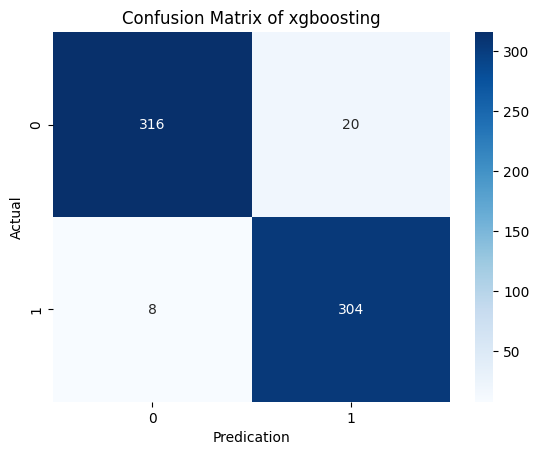

In [122]:
xgboosting(x_train,x_test,y_train,y_test,'xgboosting')

Accuracy of None is : 84.87654320987654%
--------------------------------------------
classification report of None is 
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       336
           1       0.84      0.85      0.84       312

    accuracy                           0.85       648
   macro avg       0.85      0.85      0.85       648
weighted avg       0.85      0.85      0.85       648



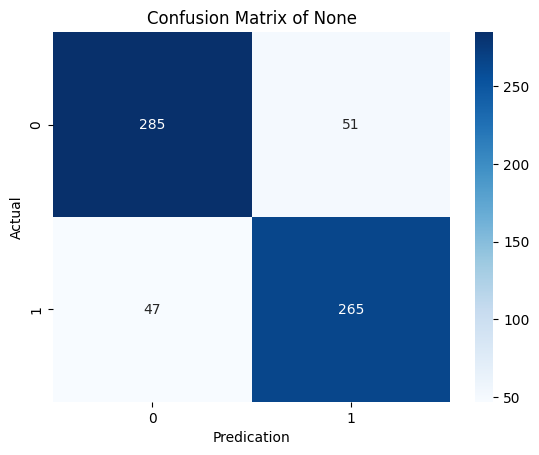

In [120]:
model=SVC(C=1,kernel='poly',degree=4)
model.fit(x_train,y_train)
ypred=model.predict(x_test)
evaluation(y_test,ypred)

Accuracy of None is : 94.9074074074074%
--------------------------------------------
classification report of None is 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       336
           1       0.92      0.98      0.95       312

    accuracy                           0.95       648
   macro avg       0.95      0.95      0.95       648
weighted avg       0.95      0.95      0.95       648



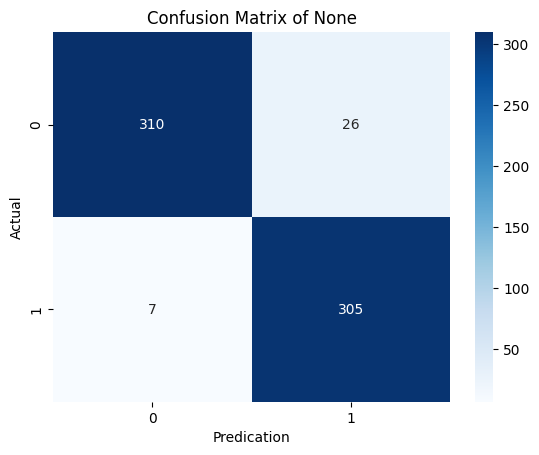

In [133]:
model_grd=GradientBoostingClassifier(learning_rate=1,max_depth=17,min_samples_leaf=5,min_samples_split=5,n_estimators=6)
model_grd.fit(x_train,y_train)
ypred=model_grd.predict(x_test)
evaluation(y_test,ypred)